# Data Collection

In [68]:
import traceback
import requests
from bs4 import BeautifulSoup

In [69]:
def remove_extra_whitespaces(s: str):
    return " ".join(s.split())


class SafeList(list):
    def append(self, __object) -> None:
        super().append(remove_extra_whitespaces(__object))

In [ ]:
import time


with open("data_raw.tsv", "a", encoding="utf-8", errors="surrogateescape") as fout:
    print("\t".join([
        "название", "год", "пробег", "коробка_передач", "привод",
        "объем_двигателя", "мощность_двигателя", "топливо", "тип",
        "город", "цена"
    ]), file=fout, end="\n")
    for i in range(1000):
        # time.sleep(5)  # не нужно, но на всякий случай
        content = requests.get(f"https://cars.avtocod.ru/avto-s-probegom/?page={i}").content
        root = BeautifulSoup(content, "lxml")
        cards = root.find("div", class_="cars-list__cards")

        for car_card in cards.find_all("div", class_="cars-list__card"):
            try:
                full_info = SafeList()
                title = car_card.find("span", class_="card-car-long__title-text").text
                full_info.append(title)
                for info in car_card.find_all("div", class_="card-car-long__info-item"):
                    info = info.text
                    if "/" in info:
                        for x in info.split("/"):
                            full_info.append(x)
                    else:
                        full_info.append(info)
                city = car_card.find("div", class_="card-car-long__seller-city").text
                full_info.append(city)
                cost = car_card.find("div", class_="card-car-long__price-value").text
                full_info.append(cost)
                # нельзя csv, там запятые внутри строк
                print("\t".join(full_info), file=fout, end="\n")
            except:
                traceback.print_exc()

# Preparation

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data_raw.tsv", sep="\t")
df

,название,год,пробег,коробка_передач,привод,объем_двигателя,мощность_двигателя,топливо,тип,город,цена
0,"Acura MDX, II",2007 г,228 454 км,Автоматическая,Полный привод,3.7 л.,300 л.с.,Бензин,Внедорожник 5 дв.,Москва,1 077 000 ₽
1,"Mazda 3, II (BL) Рестайлинг",2012 г,98 000 км,Автоматическая,Передний привод,1.6 л.,105 л.с.,Бензин,Седан 5 дв.,Москва,743 000 ₽
2,"BMW 3 серия, V (E90/E91/E92/E93) Рестайлинг",2010 г,207 416 км,Автоматическая,Задний привод,2.0 л.,136 л.с.,Бензин,Седан,Воронеж,790 000 ₽
3,"Volkswagen Touareg, II Рестайлинг",2017 г,34 260 км,Автоматическая,Полный привод,3.0 л.,245 л.с.,Дизель,Внедорожник 5 дв.,Москва,4 157 000 ₽
4,"Kia Optima, IV Рестайлинг",2019 г,76 800 км,Автоматическая,Передний привод,2.0 л.,150 л.с.,Бензин,Седан 4 дв.,Сургут,2 350 000 ₽
...,...,...,...,...,...,...,...,...,...,...,...
31996,"Toyota Land Cruiser, 200 Series Рестайлинг 2",2015 г,135 000 км,Автоматическая,Полный привод,4.5 л.,249 л.с.,Дизель,Внедорожник 5 дв.,Челябинск,4 785 000 ₽
31997,"Nissan Patrol, VI (Y62) Рестайлинг",2014 г,217 277 км,Автоматическая,Полный привод,5.6 л.,405 л.с.,Бензин,Внедорожник 5 дв.,Курган,2 066 400 ₽
31998,"Volkswagen Beetle, II (A5)",2013 г,118 832 км,Робот,Передний привод,1.2 л.,105 л.с.,Бензин,Хэтчбек 3 дв.,Санкт-Петербург,1 214 570 ₽
31999,"BMW X6, I (E71) Рестайлинг",2013 г,138 443 км,Автоматическая,Полный привод,3.0 л.,245 л.с.,Дизель,Внедорожник 5 дв.,Мурино,2 210 000 ₽


In [5]:
def extract_type(s: str):
    s_list = s.split()
    if len(s_list) > 1 and s_list[0].isalpha():
        return s_list[0]
    else:
        return s


def extract_doors_count(s: str):
    s_list = s.split()
    if len(s_list) > 1 and s_list[1].isnumeric():
        return s_list[1]
    else:
        return None


def prepare_df(df: pd.DataFrame):
    df.dropna(inplace=True)
    
    new_df = pd.DataFrame()
    # удаляем единицы измерения из данных, добавляем в заголовки
    new_df["год"] = df["год"].map(lambda x: x.replace(" г", ""))
    new_df["пробег, км"] = df["пробег"].map(lambda x: x.replace(" км", "").replace(" ", ""))
    new_df["привод"] = df["привод"].map(lambda x: x.replace(" привод", ""))
    new_df["объем_двигателя, л."] = df["объем_двигателя"].map(lambda x: x.replace(" л.", ""))
    new_df["мощность_двигателя, л.с"] = df["мощность_двигателя"].map(lambda x: x.replace(" л.с.", ""))
    new_df["тип"] = df["тип"].map(extract_type)
    new_df["количество_дверей"] = df["тип"].map(extract_doors_count)
    new_df["город"] = df["город"]
    new_df["цена, р"] = df["цена"].map(lambda x: x.replace(" ₽", "").replace(" ", ""))

    new_df.dropna(inplace=True)
    new_df = new_df.astype({
        "год": "int",
        "пробег, км": "int",
        "привод": "category",
        "объем_двигателя, л.": "float",
        "мощность_двигателя, л.с": "int",
        "тип": "category",
        "количество_дверей": "int",
        "город": "category",
        "цена, р": "int"
    })
    # делаем признаки категориальными
    return new_df[new_df["привод"] != "Задний"]

In [6]:
df_prepared = prepare_df(df)
df_prepared

,год,"пробег, км",привод,"объем_двигателя, л.","мощность_двигателя, л.с",тип,количество_дверей,город,"цена, р"
0,2007,228454,Полный,3.7,300,Внедорожник,5,Москва,1077000
1,2012,98000,Передний,1.6,105,Седан,5,Москва,743000
3,2017,34260,Полный,3.0,245,Внедорожник,5,Москва,4157000
4,2019,76800,Передний,2.0,150,Седан,4,Сургут,2350000
6,2017,132000,Передний,1.6,122,Внедорожник,5,Воронеж,1125000
...,...,...,...,...,...,...,...,...,...
31995,2019,56392,Передний,1.6,123,Седан,4,Новокузнецк,1059000
31996,2015,135000,Полный,4.5,249,Внедорожник,5,Челябинск,4785000
31997,2014,217277,Полный,5.6,405,Внедорожник,5,Курган,2066400
31998,2013,118832,Передний,1.2,105,Хэтчбек,3,Санкт-Петербург,1214570


In [7]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23853 entries, 0 to 31999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   год                      23853 non-null  int64   
 1   пробег, км               23853 non-null  int64   
 2   привод                   23853 non-null  category
 3   объем_двигателя, л.      23853 non-null  float64 
 4   мощность_двигателя, л.с  23853 non-null  int64   
 5   тип                      23853 non-null  category
 6   количество_дверей        23853 non-null  int64   
 7   город                    23853 non-null  category
 8   цена, р                  23853 non-null  int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 1.3 MB


# Visualization

In [9]:
import seaborn as sns

<AxesSubplot:>

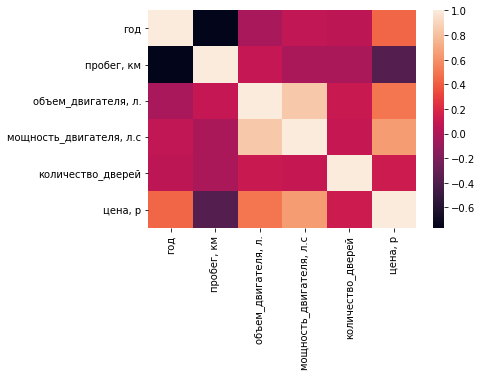

In [10]:
sns.heatmap(df_prepared.corr())

<AxesSubplot:xlabel='год', ylabel='пробег, км'>

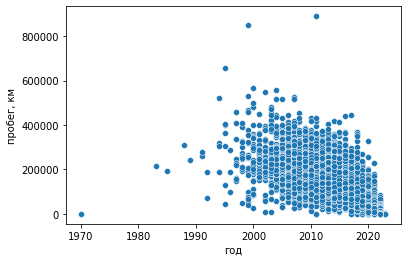

In [13]:
sns.scatterplot(x="год", y="пробег, км", data=df_prepared)

<AxesSubplot:xlabel='год', ylabel='count'>

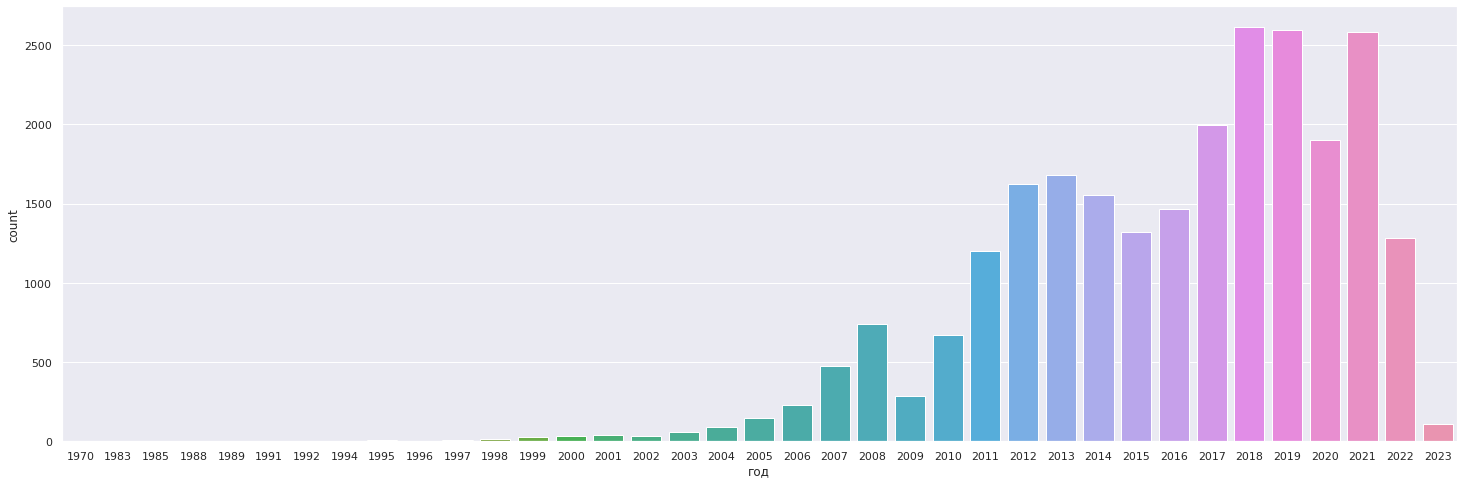

In [14]:
sns.set(rc={'figure.figsize':(25, 8)})
sns.countplot(x="год", data=df_prepared)

<AxesSubplot:xlabel='цена, р'>

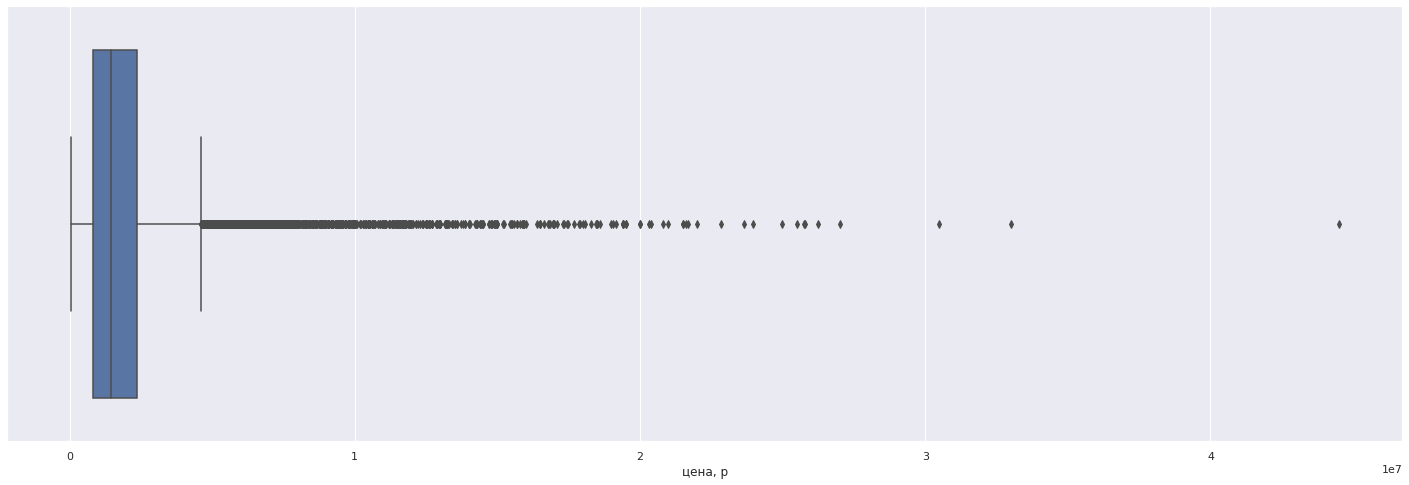

In [15]:
sns.boxplot(x="цена, р", data=df_prepared)

<AxesSubplot:xlabel='цена, р'>

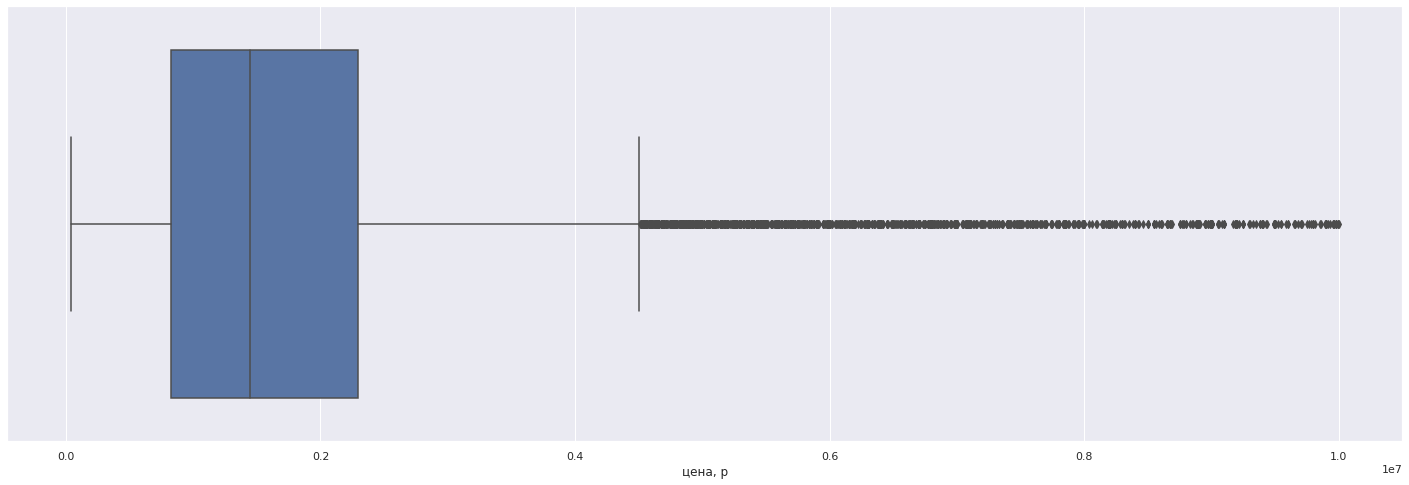

In [16]:
sns.boxplot(x="цена, р", data=df_prepared[df_prepared["цена, р"] < 10_000_000])

<AxesSubplot:xlabel='тип', ylabel='count'>

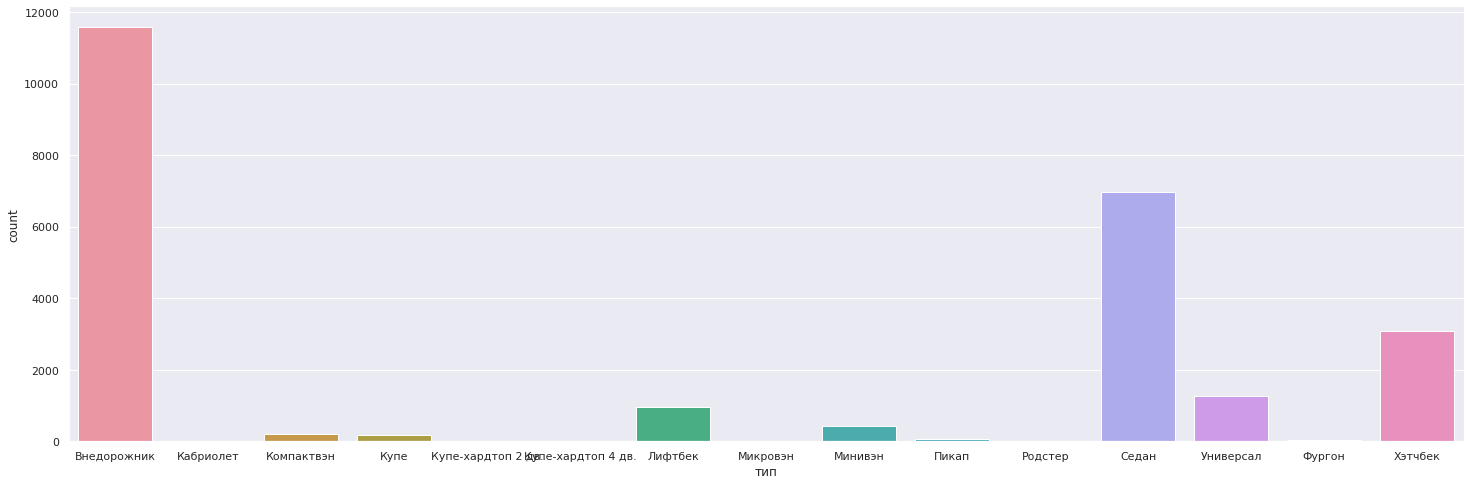

In [17]:
sns.countplot(x="тип", data=df_prepared)

<AxesSubplot:xlabel='цена, р', ylabel='пробег, км'>

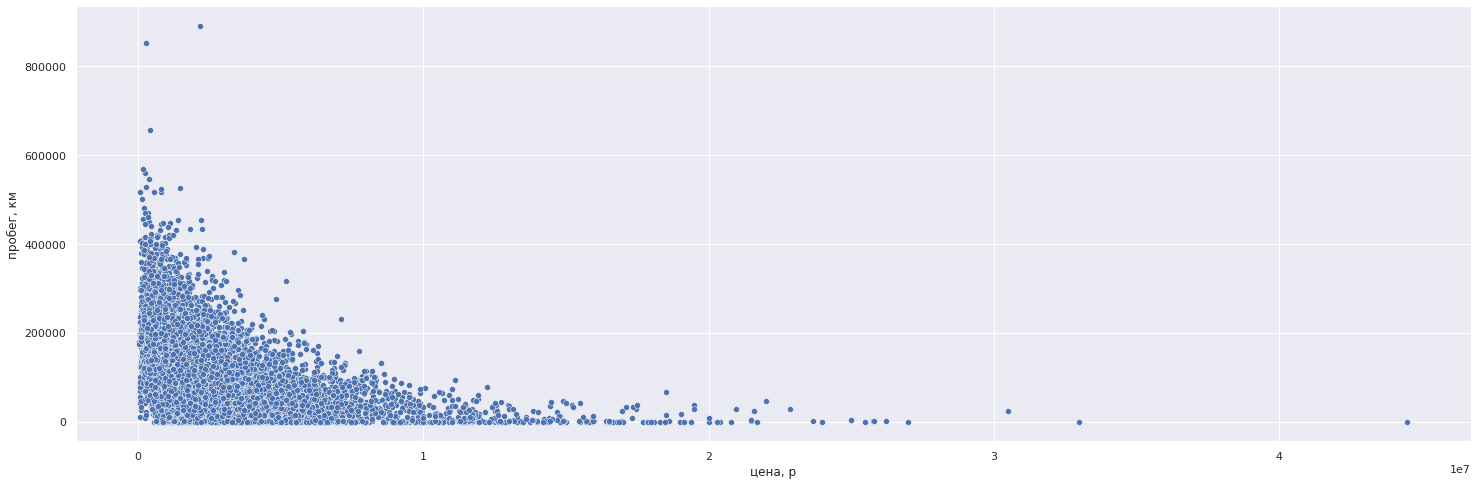

In [18]:
sns.scatterplot(x="цена, р", y="пробег, км", data=df_prepared)

<AxesSubplot:xlabel='объем_двигателя, л.', ylabel='count'>

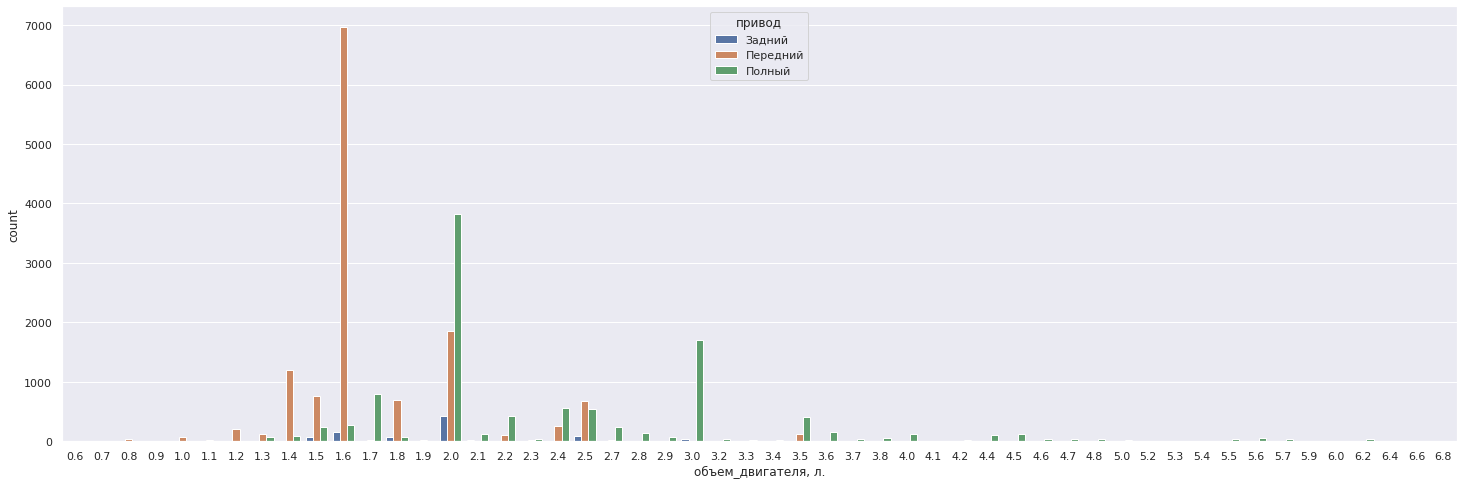

In [23]:
sns.countplot(data=df_prepared, x="объем_двигателя, л.", hue="привод")

In [36]:
import plotly.express as px

In [51]:
px.pie(df_prepared, "тип")

# ML

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [6]:
df_for_regression = df_prepared.copy(deep=True)

In [7]:
df_for_regression["город"] = df_for_regression["город"].cat.codes
df_for_regression["тип"] = df_for_regression["тип"].cat.codes
df_for_regression["привод"] = df_for_regression["привод"].cat.codes
df_for_regression

,год,"пробег, км",привод,"объем_двигателя, л.","мощность_двигателя, л.с",тип,количество_дверей,город,"цена, р"
0,2007,228454,2,3.7,300,0,5,33,1077000
1,2012,98000,1,1.6,105,11,5,33,743000
3,2017,34260,2,3.0,245,0,5,33,4157000
4,2019,76800,1,2.0,150,11,4,64,2350000
6,2017,132000,1,1.6,122,0,5,14,1125000
...,...,...,...,...,...,...,...,...,...
31995,2019,56392,1,1.6,123,11,4,43,1059000
31996,2015,135000,2,4.5,249,0,5,78,4785000
31997,2014,217277,2,5.6,405,0,5,27,2066400
31998,2013,118832,1,1.2,105,14,3,57,1214570


In [11]:
X = df_for_regression.drop(columns=["цена, р"])
y = df_for_regression["цена, р"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=239) 

In [20]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
cross_val_score(linear_regression, X, y, cv=4)

array([0.63256976, 0.56020222, 0.55652313, 0.58496664])

In [21]:
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, y_train)
cross_val_score(gradient_boosting_regressor, X, y, cv=4)

array([0.88057665, 0.86731835, 0.84133511, 0.86111875])

In [22]:
supporting_vector_regressor = SVR()
supporting_vector_regressor.fit(X_train, y_train)
cross_val_score(supporting_vector_regressor, X, y, cv=4)

array([-0.06457739, -0.03320901, -0.0612853 , -0.10201325])

In [36]:
supporting_vector_regressor.score(X_test, y_test)
# cross_val_score(supporting_vector_regressor, X, y, cv=4, scoring="neg_root_mean_squared_error")

-0.04854413218704656

In [37]:
gradient_boosting_regressor.score(X_test, y_test)
# cross_val_score(gradient_boosting_regressor, X, y, cv=4, scoring="neg_root_mean_squared_error")

0.8440044756527797

In [41]:
help(supporting_vector_regressor.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.svm._classes.SVR instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitt

In [38]:
linear_regression.score(X_test, y_test)
# cross_val_score(linear_regression, X, y, cv=4, scoring="neg_root_mean_squared_error")

0.5736027203424457

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net.score(X_test, y_test)

0.5724388385436031

In [43]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
sgd_regressor.score(X_test, y_test)

-1.046895734178831e+24

In [12]:
from catboost import CatBoostRegressor

cat_boost_regressor = CatBoostRegressor()
cat_boost_regressor.fit(X_train, y_train)
cat_boost_regressor.score(X_test, y_test)

Learning rate set to 0.065646
0:	learn: 1895426.4453974	total: 50.2ms	remaining: 50.1s
1:	learn: 1812717.9708199	total: 52.6ms	remaining: 26.3s
2:	learn: 1735209.0517909	total: 55.8ms	remaining: 18.5s
3:	learn: 1659446.3652127	total: 58.5ms	remaining: 14.6s
4:	learn: 1591596.6933690	total: 60.9ms	remaining: 12.1s
5:	learn: 1526321.4312812	total: 63.4ms	remaining: 10.5s
6:	learn: 1469382.7177340	total: 65.9ms	remaining: 9.34s
7:	learn: 1413462.5120033	total: 68.3ms	remaining: 8.47s
8:	learn: 1364003.6862841	total: 73.6ms	remaining: 8.1s
9:	learn: 1315486.0325979	total: 76.4ms	remaining: 7.57s
10:	learn: 1271608.8633888	total: 79.1ms	remaining: 7.12s
11:	learn: 1231516.2412290	total: 81.6ms	remaining: 6.71s
12:	learn: 1193646.8517565	total: 84.1ms	remaining: 6.38s
13:	learn: 1158099.8885946	total: 86.7ms	remaining: 6.1s
14:	learn: 1125536.5555242	total: 89.2ms	remaining: 5.86s
15:	learn: 1098341.5280331	total: 91.8ms	remaining: 5.64s
16:	learn: 1071890.3456876	total: 94.2ms	remaining: 5.

0.8890177852200978

In [44]:
cat_boost_regressor.get_feature_importance()

array([27.12415697, 11.28513829, 2.98529513, 16.48131229, 37.54610148,
 3.31910485, 0.47554483, 0.78334615])

In [43]:
# try to increase best model's results
X_train_1 = X_train.drop(columns=["город", "количество_дверей"])
X_test_1 = X_test.drop(columns=["город", "количество_дверей"])

# "город" и "количество дверей" действительно только сбивает модель
cb_regressor_2 = CatBoostRegressor()
cb_regressor_2.fit(X_train_1, y_train)
cb_regressor_2.score(X_test_1, y_test)

Learning rate set to 0.065646
0:	learn: 1896790.8564294	total: 2.41ms	remaining: 2.41s
1:	learn: 1811779.3554055	total: 4.69ms	remaining: 2.34s
2:	learn: 1734089.7597357	total: 6.9ms	remaining: 2.29s
3:	learn: 1660356.3977036	total: 9.09ms	remaining: 2.26s
4:	learn: 1590093.1265514	total: 11.2ms	remaining: 2.24s
5:	learn: 1528000.9694547	total: 13.4ms	remaining: 2.22s
6:	learn: 1469570.0241598	total: 15.5ms	remaining: 2.19s
7:	learn: 1413845.0045823	total: 17.6ms	remaining: 2.18s
8:	learn: 1362095.5414840	total: 19.7ms	remaining: 2.17s
9:	learn: 1315716.9717063	total: 21.8ms	remaining: 2.16s
10:	learn: 1271126.6298371	total: 24ms	remaining: 2.16s
11:	learn: 1231287.2615103	total: 26ms	remaining: 2.14s
12:	learn: 1194838.8004141	total: 28.2ms	remaining: 2.14s
13:	learn: 1159081.5286637	total: 30.3ms	remaining: 2.13s
14:	learn: 1127430.9977185	total: 32.4ms	remaining: 2.13s
15:	learn: 1099254.9435093	total: 34.5ms	remaining: 2.12s
16:	learn: 1071206.6427108	total: 36.6ms	remaining: 2.12s

0.8921978574793396

In [19]:
normalized_X_train=(X_train_1-X_train_1.min())/(X_train_1.max()-X_train_1.min())
normalized_X_test=(X_test_1-X_test_1.min())/(X_test_1.max()-X_test_1.min())
normalized_X_train

,год,"пробег, км",привод,"объем_двигателя, л.","мощность_двигателя, л.с",тип,количество_дверей
2036,0.924528,0.017763,1.0,0.225806,0.350081,0.000000,1.00
25317,0.962264,0.019101,0.5,0.161290,0.145867,0.785714,0.75
27327,0.886792,0.212909,0.5,0.225806,0.189627,0.000000,1.00
30908,0.886792,0.037165,1.0,0.387097,0.481361,1.000000,1.00
4805,0.867925,0.217554,0.5,0.129032,0.119935,0.785714,0.75
...,...,...,...,...,...,...,...
20354,0.924528,0.039876,0.5,0.306452,0.239870,0.785714,0.75
6039,0.943396,0.080876,0.5,0.161290,0.145867,0.785714,0.75
27877,0.962264,0.038202,1.0,0.338710,0.189627,0.000000,1.00
13786,0.924528,0.037228,1.0,0.225806,0.320908,0.000000,1.00


In [20]:
cb_regressor_3 = CatBoostRegressor()  # нормализация сильно ухудшает результат
cb_regressor_3.fit(normalized_X_train, y_train)
cb_regressor_3.score(normalized_X_test, y_test)

Learning rate set to 0.065646
0:	learn: 1897777.1007315	total: 2.41ms	remaining: 2.41s
1:	learn: 1817052.7577031	total: 4.7ms	remaining: 2.35s
2:	learn: 1735732.9984118	total: 7ms	remaining: 2.33s
3:	learn: 1664067.2021768	total: 9.2ms	remaining: 2.29s
4:	learn: 1596187.7533439	total: 11.4ms	remaining: 2.27s
5:	learn: 1531932.6378202	total: 13.7ms	remaining: 2.26s
6:	learn: 1472825.9829998	total: 16.3ms	remaining: 2.31s
7:	learn: 1415876.3620715	total: 18.5ms	remaining: 2.29s
8:	learn: 1366554.5538724	total: 20.7ms	remaining: 2.28s
9:	learn: 1319075.2892783	total: 22.9ms	remaining: 2.26s
10:	learn: 1274795.4796318	total: 25.1ms	remaining: 2.26s
11:	learn: 1233664.5821133	total: 27.3ms	remaining: 2.25s
12:	learn: 1196949.4311393	total: 29.6ms	remaining: 2.25s
13:	learn: 1162785.8245301	total: 31.9ms	remaining: 2.25s
14:	learn: 1130481.9940032	total: 34.2ms	remaining: 2.24s
15:	learn: 1099312.6746777	total: 36.4ms	remaining: 2.24s
16:	learn: 1071939.7789878	total: 38.7ms	remaining: 2.23s

0.7157753057928393

In [22]:
X_test

,год,"пробег, км",привод,"объем_двигателя, л.","мощность_двигателя, л.с",тип,количество_дверей,город
23406,2016,63889,1,1.6,122,0,5,74
25678,2018,101000,1,1.6,87,11,4,2
690,2021,65730,1,1.6,123,14,5,33
31302,2019,36732,2,2.0,150,0,5,32
1443,2018,103600,1,2.0,150,11,4,33
...,...,...,...,...,...,...,...,...
29135,2014,71600,1,1.6,129,14,5,32
18608,2012,215829,2,3.0,250,0,5,33
21845,2004,226000,1,2.0,175,11,4,33
21705,2022,21,2,2.2,199,0,5,74


In [35]:
row_index = [690]
print("predicted")
print(cb_regressor_2.predict(X_test_1.iloc[row_index, :]))
print("actual")
y_test.iloc[row_index]

predicted
[707643.91774648]
actual


25053 659000
Name: цена, р, dtype: int64

In [9]:
# уберем кодирование, получилось еще чуть лучше
# наконец, уберем ненужные колонки - и получится еще лучше
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
X = df_prepared.drop(columns=["цена, р", "количество_дверей", "город"])
y = df_prepared["цена, р"]
X_train_2, X_test_2, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=239) 

cb_regressor_ = CatBoostRegressor(cat_features=["привод", "тип"])
cb_regressor_.fit(X_train_2, y_train)
cb_regressor_.score(X_test_2, y_test)

Learning rate set to 0.065241
0:	learn: 1905834.2801205	total: 66.7ms	remaining: 1m 6s
1:	learn: 1823362.5970524	total: 73ms	remaining: 36.4s
2:	learn: 1749361.3330941	total: 78.9ms	remaining: 26.2s
3:	learn: 1678222.2101358	total: 87.4ms	remaining: 21.8s
4:	learn: 1609020.2959535	total: 92.8ms	remaining: 18.5s
5:	learn: 1543436.7835289	total: 98.8ms	remaining: 16.4s
6:	learn: 1484286.8841472	total: 105ms	remaining: 14.8s
7:	learn: 1432080.8236597	total: 111ms	remaining: 13.7s
8:	learn: 1381075.7169441	total: 117ms	remaining: 12.8s
9:	learn: 1334604.1023156	total: 122ms	remaining: 12.1s
10:	learn: 1288773.0026390	total: 127ms	remaining: 11.5s
11:	learn: 1248621.0266097	total: 133ms	remaining: 10.9s
12:	learn: 1212274.0396520	total: 139ms	remaining: 10.5s
13:	learn: 1176897.1082455	total: 144ms	remaining: 10.2s
14:	learn: 1144848.4400167	total: 151ms	remaining: 9.88s
15:	learn: 1115741.1783064	total: 156ms	remaining: 9.62s
16:	learn: 1087824.8619381	total: 162ms	remaining: 9.38s
17:	lea

0.9149327423717691

In [ ]:
# подбор гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
X = df_prepared.drop(columns=["цена, р", "количество_дверей", "город"])
y = df_prepared["цена, р"]
X_train_2, X_test_2, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=239) 

model = CatBoostRegressor(cat_features=["привод", "тип"])

parameters = {
    'depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'iterations': [20, 100, 200]
}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=4, n_jobs=-1)
grid.fit(X_train_2, y_train)

In [25]:
model = CatBoostRegressor(cat_features=["привод", "тип"], iterations=100, learning_rate=0.2, depth=10)
model.fit(X_train_2, y_train)
model.score(X_test_2, y_test)

0:	learn: 1704298.5372582	total: 15.5ms	remaining: 1.53s
1:	learn: 1478871.6149601	total: 26.7ms	remaining: 1.31s
2:	learn: 1297018.8202931	total: 37.3ms	remaining: 1.21s
3:	learn: 1153966.6628033	total: 48ms	remaining: 1.15s
4:	learn: 1044724.4220082	total: 58.8ms	remaining: 1.12s
5:	learn: 965737.4183184	total: 83ms	remaining: 1.3s
6:	learn: 892422.0614096	total: 93.7ms	remaining: 1.25s
7:	learn: 842393.7985901	total: 104ms	remaining: 1.2s
8:	learn: 803664.5379103	total: 116ms	remaining: 1.17s
9:	learn: 774129.1216519	total: 126ms	remaining: 1.13s
10:	learn: 752818.1051014	total: 137ms	remaining: 1.1s
11:	learn: 736331.5631163	total: 147ms	remaining: 1.08s
12:	learn: 720517.2431005	total: 158ms	remaining: 1.06s
13:	learn: 709995.4249233	total: 169ms	remaining: 1.03s
14:	learn: 699321.6480004	total: 179ms	remaining: 1.02s
15:	learn: 681381.3846342	total: 190ms	remaining: 999ms
16:	learn: 668651.0341212	total: 201ms	remaining: 980ms
17:	learn: 657253.8401899	total: 212ms	remaining: 965

0.9140507705071008

In [27]:
model = CatBoostRegressor(cat_features=["привод", "тип"], iterations=100, learning_rate=0.2, depth=15)
model.fit(X_train_2, y_train)
model.score(X_test_2, y_test)

0:	learn: 1701415.8102962	total: 637ms	remaining: 1m 3s
1:	learn: 1467166.6880722	total: 1.26s	remaining: 1m 2s
2:	learn: 1281272.6936724	total: 1.44s	remaining: 46.7s
3:	learn: 1136574.0058884	total: 1.5s	remaining: 36s
4:	learn: 1025696.2380027	total: 2.1s	remaining: 39.9s
5:	learn: 940029.2444678	total: 2.73s	remaining: 42.8s
6:	learn: 874425.5231827	total: 3.31s	remaining: 44s
7:	learn: 825371.4415960	total: 4.07s	remaining: 46.8s
8:	learn: 785625.4419417	total: 4.6s	remaining: 46.5s
9:	learn: 755822.8531923	total: 5.13s	remaining: 46.1s
10:	learn: 734311.3864000	total: 5.66s	remaining: 45.8s
11:	learn: 708849.9514588	total: 6.19s	remaining: 45.4s
12:	learn: 692890.7651366	total: 6.36s	remaining: 42.6s
13:	learn: 679047.2428934	total: 6.9s	remaining: 42.4s
14:	learn: 666844.7748375	total: 7.43s	remaining: 42.1s
15:	learn: 645465.9728936	total: 7.96s	remaining: 41.8s
16:	learn: 627320.5317932	total: 8.49s	remaining: 41.4s
17:	learn: 613963.3801250	total: 9.02s	remaining: 41.1s
18:	l

0.9136577875918129

In [28]:
cross_val_score(cb_regressor_, X, y, cv=4)

Learning rate set to 0.064579
0:	learn: 2000360.5687143	total: 6.13ms	remaining: 6.12s
1:	learn: 1913309.8452651	total: 11.6ms	remaining: 5.77s
2:	learn: 1831159.9574417	total: 17ms	remaining: 5.64s
3:	learn: 1755867.7522857	total: 22.3ms	remaining: 5.56s
4:	learn: 1683277.8313658	total: 28.2ms	remaining: 5.61s
5:	learn: 1619542.7277787	total: 33.5ms	remaining: 5.55s
6:	learn: 1558045.3283790	total: 38.6ms	remaining: 5.47s
7:	learn: 1502608.9185620	total: 44ms	remaining: 5.46s
8:	learn: 1450335.7447318	total: 49ms	remaining: 5.4s
9:	learn: 1397577.6842430	total: 54.4ms	remaining: 5.38s
10:	learn: 1352685.9475986	total: 59.8ms	remaining: 5.38s
11:	learn: 1310706.8280288	total: 66.1ms	remaining: 5.44s
12:	learn: 1272379.2067549	total: 71.4ms	remaining: 5.42s
13:	learn: 1236324.6030459	total: 76.7ms	remaining: 5.4s
14:	learn: 1202265.7542077	total: 81.3ms	remaining: 5.34s
15:	learn: 1170791.7015428	total: 87.6ms	remaining: 5.39s
16:	learn: 1141668.5728635	total: 92.9ms	remaining: 5.37s
17

array([0.9133665 , 0.9206275 , 0.8873351 , 0.90874852])